In [1]:
import pandas as pd 
import numpy as np 
import re   # regular expression 

In [2]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 9C35-B5F9

 Directory of C:\Users\Ranjit\Desktop\3rd_july_datascience\email_classification

06-08-2024  11:56    <DIR>          .
06-08-2024  11:56    <DIR>          ..
05-08-2024  10:24    <DIR>          .ipynb_checkpoints
05-08-2024  10:19    <DIR>          Data
06-08-2024  11:50               192 demo.txt
06-08-2024  11:56            31,181 email.ipynb
               2 File(s)         31,373 bytes
               4 Dir(s)  15,325,487,104 bytes free


In [3]:
message = """
Hiii we are from upflairs, and thank you for joining
our data science and machine program.
"""
file = open('demo.txt','w')  
file.write(message)
file.close()



In [4]:
file = open('demo.txt','r') 
data = file.read()
print(data)


Hiii we are from upflairs, and thank you for joining
our data science and machine program.



In [5]:
message = """
\nHiii we are from upflairs, and thank you for joining
our data science and machine program.
"""
file = open('demo.txt','a')  
file.write(message)
file.close()



In [6]:
file = open('demo.txt','r') 
data = file.read()
print(data)


Hiii we are from upflairs, and thank you for joining
our data science and machine program.


Hiii we are from upflairs, and thank you for joining
our data science and machine program.



In [7]:
file = open('demo.txt','r') 
data = file.read()
file.close()
print(data)


Hiii we are from upflairs, and thank you for joining
our data science and machine program.


Hiii we are from upflairs, and thank you for joining
our data science and machine program.



In [8]:
with open('demo.txt','r')  as file:
    data = file.read()
    print(data)


Hiii we are from upflairs, and thank you for joining
our data science and machine program.


Hiii we are from upflairs, and thank you for joining
our data science and machine program.



In [9]:
# 

In [10]:
### file handling 
# Message = "hii we are from upflairs, thank you!" 

# "assign.txt"   ==> 1000 times 

In [11]:
file_path = "./Data/SMSSpamCollection.txt"

file = open(file_path)
data = file.read()
file.close() 

In [12]:
print("Total no. of emails : ", len(data.split('\n')))

Total no. of emails :  5575


In [13]:
data.split('\n')[1]

'ham\tOk lar... Joking wif u oni...'

In [14]:
x = []
y = []
for line in data.split('\n'):
    if len(line.split('\t')) == 2 :
        y.append(line.split('\t')[0])
        x.append(line.split('\t')[1])

In [15]:
len(x) , len(y)

(5574, 5574)

In [16]:
x[1]  # email message 

'Ok lar... Joking wif u oni...'

In [17]:
y[1]   # label 

'ham'

In [18]:
# create dataframe 
email_data = pd.DataFrame({"email_message":x,"labels":y})
email_data.head()

,email_message,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [19]:
import  pandas as pd 

In [20]:
df2 = pd.read_table(file_path)
df2.columns=["labels",'email_message'] 
df2.head()


,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [21]:
print("Total no. of emails : ",df2.shape[0])

Total no. of emails :  5571


In [22]:
single_email = df2['email_message'][1]
single_email

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [23]:
type(single_email)

str

In [24]:
single_email = single_email.lower()

In [25]:
single_email 

"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's"

In [26]:
import re   # regular expression 

In [27]:
re.findall("2",single_email)

['2', '2', '2', '2', '2']

In [28]:
re.sub("[^a-zA-Z ]","",single_email)  # substitute

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [29]:
single_email.replace('2',"")
single_email.replace('3',"")
single_email.replace('4',"")


"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 0852810075over18's"

In [30]:
df2 

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [31]:
# lowercase 
# a-zA-Z  other char removed 
for i in range(len(df2['email_message'])):
    email_message = df2['email_message'][i]
    email_message = email_message.lower()
    df2['email_message'][i] = re.sub("[^a-zA-Z ]","",email_message)
    

C:\Users\Ranjit\AppData\Local\Temp\ipykernel_13804\1883652009.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['email_message'][i] = re.sub("[^a-zA-Z ]","",email_message)


In [32]:
df2['labels'].value_counts()

labels
ham     4824
spam     747
Name: count, dtype: int64

In [33]:
df2.head()

,labels,email_message
0,ham,ok lar joking wif u oni
1,spam,free entry in a wkly comp to win fa cup final...
2,ham,u dun say so early hor u c already then say
3,ham,nah i dont think he goes to usf he lives aroun...
4,spam,freemsg hey there darling its been weeks now ...


In [34]:
ham =  df2[df2['labels'] == "ham"]
spam =  df2[df2['labels'] == "spam"]

In [35]:
spam.shape 

(747, 2)

In [36]:
ham.shape 

(4824, 2)

In [37]:
ham = ham.sample(1000)

In [38]:
ham.shape 

(1000, 2)

In [39]:
# spam = spam.sample(1000,replace=True)

In [40]:
spam.shape  , ham.shape 

((747, 2), (1000, 2))

In [41]:
new_df = pd.concat([spam,ham])

In [42]:
new_df.shape 

(1747, 2)

In [43]:
new_df.duplicated().sum()

154

In [44]:
spam.duplicated().sum()

130

In [45]:
ham.duplicated().sum() 

24

In [46]:
new_df['labels'].value_counts()

labels
ham     1000
spam     747
Name: count, dtype: int64

In [47]:
new_df['labels'] = new_df['labels'].map({'spam':1,'ham':0})

In [48]:
x = new_df['email_message']
y = new_df['labels']

In [49]:
type(x)

pandas.core.series.Series

In [50]:
x = x.values

In [51]:
type(x)

numpy.ndarray

In [53]:
x.shape , len(y)

((1747,), 1747)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow_obj = CountVectorizer(max_features=1500,stop_words='english')

X = bow_obj.fit_transform(x)
X 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12624 stored elements and shape (1747, 1500)>

In [59]:
X_transformed = X.toarray()

In [64]:
X_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
y.shape  , X_transformed.shape 

((1747,), (1747, 1500))

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.15,random_state=42)

In [73]:
## Model training  algorithm train 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB , GaussianNB
mnb = MultinomialNB()
bnb = BernoulliNB()


mnb.fit(x_train,y_train) 
bnb.fit(x_train,y_train) 
print("ALgorithms trained on the data!") 

print("Multinomial Naive bayes")
print("Training score : ",mnb.score(x_train,y_train))
print("Testing score : ",  mnb.score(x_test,y_test) )
print()
print("Bernoli Naive bayes")
print("Training score : ",bnb.score(x_train,y_train))
print("Testing score : ",  bnb.score(x_test,y_test) )

ALgorithms trained on the data!
Multinomial Naive bayes
Training score :  0.9669811320754716
Testing score :  0.9505703422053232

Bernoli Naive bayes
Training score :  0.9568733153638814
Testing score :  0.9467680608365019


In [76]:
### prediction 
prediction = mnb.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [78]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [88]:
evaluation_df =  pd.DataFrame({"actual_class":y_test.values,"predicted_class":prediction})
evaluation_df.head(40)

,actual_class,predicted_class
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


In [83]:
evaluation_df['actual_class'] = evaluation_df['actual_class'].map({1:'spam',0:'ham'})
evaluation_df['predicted_class'] = evaluation_df['predicted_class'].map({1:'spam',0:'ham'})


In [84]:
evaluation_df.head(40)

,actual_class,predicted_class
0,ham,ham
1,ham,ham
2,spam,spam
3,spam,spam
4,spam,spam
5,ham,ham
6,ham,ham
7,spam,spam
8,spam,spam
9,spam,spam


In [86]:
from sklearn.metrics import confusion_matrix , classification_report

In [93]:
matrix = confusion_matrix(evaluation_df['actual_class'],evaluation_df['predicted_class'])
matrix 

array([[137,   4],
       [  9, 113]], dtype=int64)

In [99]:
import seaborn   as sns 
import matplotlib.pyplot as plt 


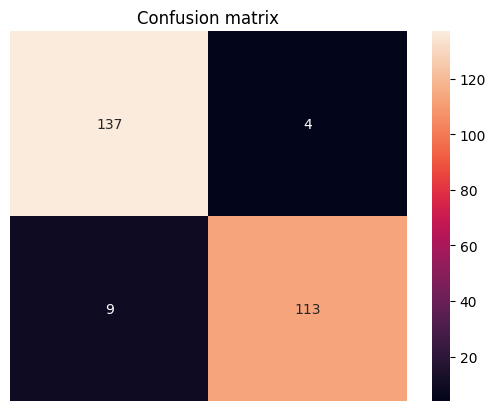

In [111]:
sns.heatmap(matrix,annot=True,fmt='d') 
plt.title('Confusion matrix')
plt.axis('off')
plt.show()

In [101]:
print(classification_report(evaluation_df['actual_class'],evaluation_df['predicted_class']))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       141
           1       0.97      0.93      0.95       122

    accuracy                           0.95       263
   macro avg       0.95      0.95      0.95       263
weighted avg       0.95      0.95      0.95       263



In [109]:
## Models save  
import joblib , os 
os.makedirs('models',exist_ok=True)

joblib.dump(mnb,'./models/multinomialnaivebayes.lb')
joblib.dump(bnb,'./models/bernolinaivebayes.lb')
joblib.dump(bow_obj,'./models/countvectorizer.lb')
print("Your object is saved!")
 

Your object is saved!
